# <center> Heart Disease Prediction</center>

# Problem Statement 
The problem statement for heart disease prediction is to help people with cardiovascular disease (CVD) or those at high risk of CVD get early detection and management.

# Steps and Tasks :
# Step 1 : Reading and understanding of data
# Step 2 : Data cleaning and Preparation
# Step 3 : Visualizing the data
# Step 4 : Deriving new features
# Step 5 : Train-Test Split and feature scaling
# Step 6 : Model Building
# Step 7 : Accuracy and Evaluation

## Import some libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data collection and processing

In [2]:
# loading the dataset 
df = pd.read_csv("B:\\6th sem\\Internship\\project\\heart_disease_data.csv")

In [3]:
# show first 5 rows of the dataset 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#print last 5 rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#print numbers of rows and columns in the dataset
df.shape

(303, 14)

In [6]:
# print columns name of the dataset
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
# getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# checking missing values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# statistical measures about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis

<AxesSubplot:>

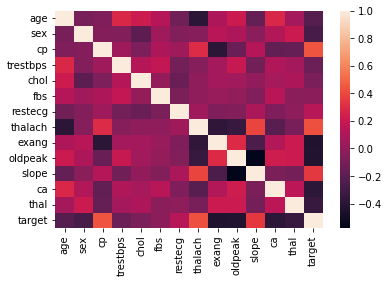

In [56]:
# check correlation between each columns
sns.heatmap(df.corr())

In [74]:
# checking the distribution of target variable
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

 1  represents a defective heart
 0  represents a healthy heart

<AxesSubplot:xlabel='target', ylabel='count'>

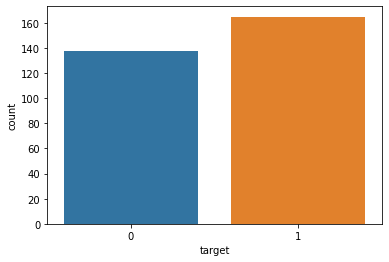

In [67]:
sns.countplot(x="target",data=df)

In [69]:
df['sex'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:xlabel='sex', ylabel='count'>

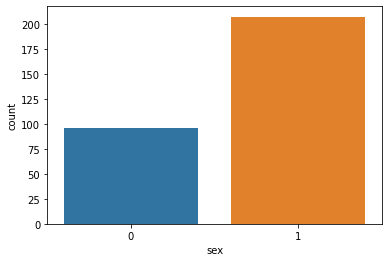

In [68]:
# Check the Gender, how namy male and female in dataset 
sns.countplot(x="sex",data=df)

0 represent female & 1 Represents a Male 

<AxesSubplot:xlabel='sex', ylabel='target'>

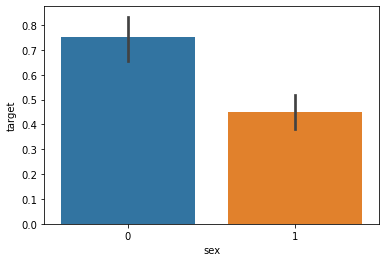

In [64]:
# check the Heart problem based on the sex
sns.barplot(x="sex", y="target", data=df)

In the dataset  females are more likely to have heart problems than males

In [70]:
# check chest Pain type with the unique value
df["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

4 types of chest pain

<AxesSubplot:xlabel='cp', ylabel='target'>

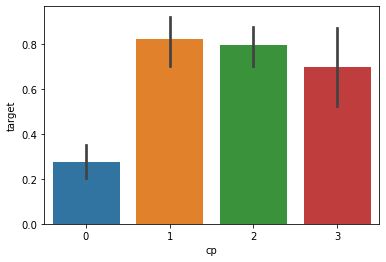

In [73]:
# chest pain based on Heart problem
sns.barplot(x="cp", y="target", data = df)

chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

# splitting the feature and target

In [11]:
x = df.drop(['target'], axis = 1) 

In [12]:
y = df['target']

In [13]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [14]:
#print the shape of x 
x.shape

(303, 13)

In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [16]:
y.shape

(303,)

# Splitting the Data into training data  and test data

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['target'], axis =1), df['target'], test_size= 0.3, stratify = y, random_state=2)

In [42]:
# check the shape of x train data and x test data
x_train.shape, x_test.shape

((212, 13), (91, 13))

# Model Training

In [43]:
model = LogisticRegression()

In [44]:
# training the LogisticRegression model withe training data
model.fit(x_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Model Evaluation

Accuracy Score

In [45]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [46]:
training_data_accuracy

0.8443396226415094

In [47]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [48]:
test_data_accuracy

0.8461538461538461

# Building Prediction System

In [54]:
# This tuple contains the input features for a single instance (i.e., one person), to check heart disease or not
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)

#change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance 
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The person does not have a Heart disease")
    
else:
    print("The person has Heart Disease")

[1]
The person has Heart Disease


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
